In [ ]:
!pip install scikit-plot

In [ ]:
pip install --upgrade category_encoders

     |████████████████████████████████| 86 kB 3.4 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing 
from category_encoders import *
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing 
from category_encoders import *
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import scikitplot as skplt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML baylor/survey lung cancer.csv")
print(df)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2       

In [ ]:
df["GENDER"] = df["GENDER"].map({"F": 0, "M": 1})
df['LUNG_CANCER']= df['LUNG_CANCER'].map({'NO':0, "YES":1})

In [ ]:
X = df.drop(["LUNG_CANCER"], axis=1)
y = df["LUNG_CANCER"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42 )

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Default değelerle modeli eğitiyorum
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
logreg.fit(X_train, y_train)  #X_train de feature lar var y_train de kanser olup olmadığı
y_pred = logreg.predict(X_test)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) #modeli eğittim
acc_log_test = round(logreg.score(X_test,y_test)*100,2) #teste bakıyorum modeli değerlendiriyorum
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 92.71
Test Accuracy: % 96.77


              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

0.967741935483871


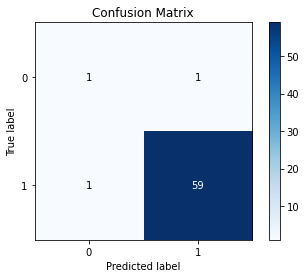

In [ ]:
print(classification_report(y_pred, y_test))
print(accuracy_score(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)
plt.show()

In [ ]:
logreg.fit(X_train,y_train)
pred_i = logreg.predict(X_train)
e_in=(np.mean(pred_i != y_train))
print(e_in)

logreg.fit(X_train,y_train)
pred_i = logreg.predict(X_test)
e_out=(np.mean(pred_i != y_test))
print(e_out)

0.0728744939271255
0.03225806451612903


In [ ]:
print("Intercept :",logreg.intercept_)
print('Slope :',logreg.coef_)

Intercept : [3.67360673]
Slope : [[-0.17702881  0.19137928  0.60260333  0.65951091  0.37264298  0.62255893
   1.03391803  1.00056221  0.61545942  0.32029232  0.8212902   0.98206895
  -0.08805517  1.04916674  0.34408843]]


In [ ]:
# roc for logistic regression 
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

AUC: 0.9167


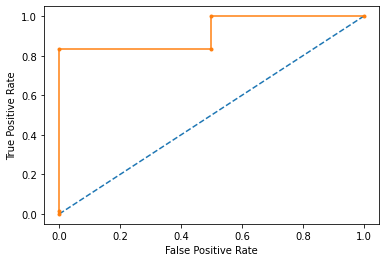

In [ ]:


# predict probabilities
probs = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
fpr2, tpr2, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# plot the roc curve for the model
pyplot.plot(fpr2, tpr2, marker='.')
# show the plot
pyplot.show()

No handles with labels found to put in legend.


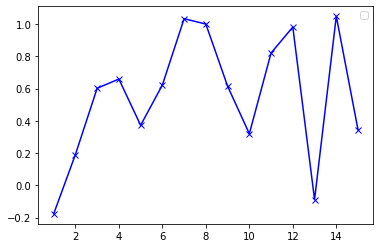

In [ ]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]
y1 = [-0.17702881,  0.19137928,  0.60260333,  0.65951091,  0.37264298,  0.62255893,
   1.03391803,  1.00056221,  0.61545942,  0.32029232,  0.8212902,   0.98206895,
  -0.08805517,  1.04916674,  0.34408843]
plt.plot(x, y1,color='blue', marker='x', )
plt.legend(loc="best")
plt.show()

without scaler

In [ ]:
X = df.drop(["LUNG_CANCER"], axis=1)
y = df["LUNG_CANCER"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42 )

In [ ]:
#Default değelerle modeli eğitiyorum
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
logreg.fit(X_train, y_train)  #X_train de feature lar var y_train de kanser olup olmadığı
y_pred = logreg.predict(X_test)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) #modeli eğittim
acc_log_test = round(logreg.score(X_test,y_test)*100,2) #teste bakıyorum modeli değerlendiriyorum
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 92.71
Test Accuracy: % 96.77


Good Features

1)Logistic Regression

In [ ]:
X = df.drop(["LUNG_CANCER","GENDER",  "AGE", "ANXIETY"], axis=1)
y = df["LUNG_CANCER"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42 )

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Default değelerle modeli eğitiyorum
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
logreg.fit(X_train, y_train)  #X_train de feature lar var y_train de kanser olup olmadığı
y_pred = logreg.predict(X_test)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) #modeli eğittim
acc_log_test = round(logreg.score(X_test,y_test)*100,2) #teste bakıyorum modeli değerlendiriyorum
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 93.52
Test Accuracy: % 98.39


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.98      0.99        61

    accuracy                           0.98        62
   macro avg       0.75      0.99      0.83        62
weighted avg       0.99      0.98      0.99        62

0.9838709677419355


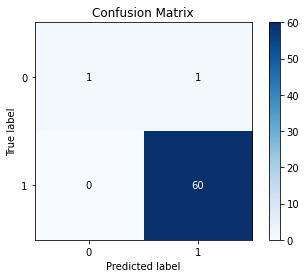

In [ ]:
print(classification_report(y_pred, y_test))
print(accuracy_score(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)
plt.show()

In [ ]:
print("Intercept :",logreg.intercept_)
print('Slope :',logreg.coef_)

Intercept : [3.60130564]
Slope : [[ 0.57136098  0.75248022  0.65340252  1.02462063  1.06112085  0.62288361
   0.22707185  0.82249583  0.9797522  -0.17618264  1.15345832  0.22617551]]


AUC: 0.9208


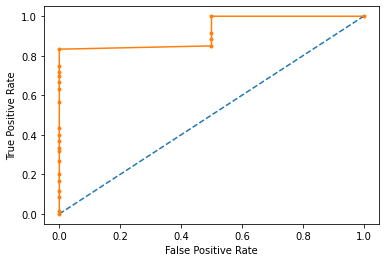

In [ ]:
# roc for logistic regression 
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
probs = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
fpr2, tpr2, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# plot the roc curve for the model
pyplot.plot(fpr2, tpr2, marker='.')
# show the plot
pyplot.show()

No handles with labels found to put in legend.


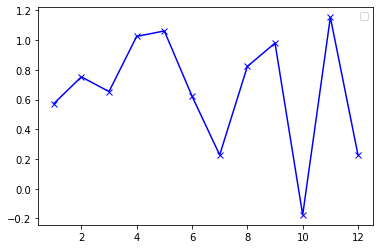

In [ ]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4, 5, 6,7,8,9,10,11,12]
y1 =[ 0.57136098 , 0.75248022 , 0.65340252 , 1.02462063 , 1.06112085 , 0.62288361,
   0.22707185 , 0.82249583 , 0.9797522 , -0.17618264 , 1.15345832 , 0.22617551]
   
plt.plot(x, y1,color='blue', marker='x', )
plt.legend(loc="best")
plt.show()

In [ ]:
#Default değelerle modeli eğitiyorum
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
logreg.fit(X_train, y_train)  #X_train de feature lar var y_train de kanser olup olmadığı
y_pred = logreg.predict(X_test)
eout= accuracy_score(y_test,y_pred)
print("testing : ", eout)

#Default değelerle modeli eğitiyorum
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
logreg.fit(X_train, y_train)  #X_train de feature lar var y_train de kanser olup olmadığı
y_pred = logreg.predict(X_train)
ein= accuracy_score(y_train,y_pred)
print("training : ", ein)

E_in= 1 - ein
print(E_in)

E_out= 1-eout
print(E_out) 

testing :  0.9838709677419355
training :  0.9352226720647774
0.06477732793522262
0.016129032258064502


In [ ]:
logreg.fit(X_train,y_train)
pred_i = logreg.predict(X_train)
e_in=(np.mean(pred_i != y_train))
print(e_in)

logreg.fit(X_train,y_train)
pred_i = logreg.predict(X_test)
e_out=(np.mean(pred_i != y_test))
print(e_out)

0.06477732793522267
0.016129032258064516


2)Random Forest

              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.93      0.98      0.96        57

    accuracy                           0.92        62
   macro avg       0.72      0.59      0.62        62
weighted avg       0.90      0.92      0.90        62

0.9193548387096774


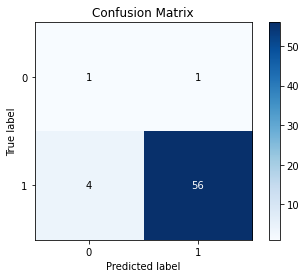

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report,  accuracy_score

model = RFC(n_estimators=40, random_state=0, 
                         oob_score = True,
                         max_depth = 10, 
                         max_features = 'sqrt')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))
print(accuracy_score(y_pred, y_test))
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)
plt.show()

AUC: 0.9375


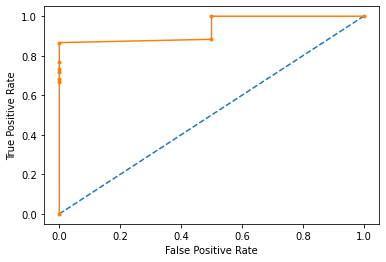

In [ ]:
#roc for randomforest
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
fpr5, tpr5, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# plot the roc curve for the model
pyplot.plot(fpr5, tpr5, marker='.')
# show the plot
pyplot.show()

In [ ]:
error_rate= []
for i in range(1,60):
    model = RFC(n_estimators=i, random_state=0, oob_score = True, max_depth = 10, max_features = 'sqrt')
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. Thi

Text(0, 0.5, 'Error Rate')

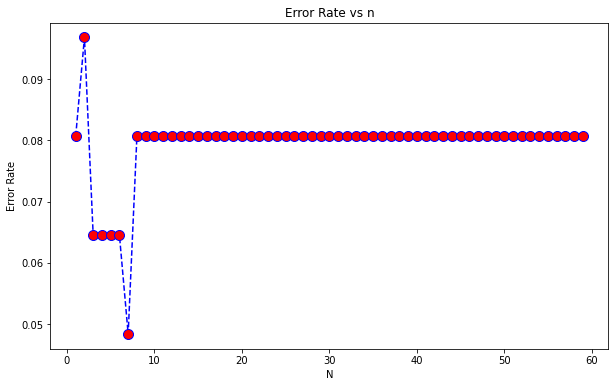

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,60),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs n')
plt.xlabel('N')
plt.ylabel('Error Rate')

In [ ]:
y_pred1 = model.predict(X_train)
traing = accuracy_score(y_pred1, y_train)
ein=1-traing    
y_t = model.predict(X_test)
testing = accuracy_score(y_test, y_t)
eout=1-testing
print(ein)
print(eout)
print("test: ",testing)
print("train: ",traing)

model.fit(X_train,y_train)
pred_i = model.predict(X_train)
e_in=(np.mean(pred_i != y_train))
print(e_in)


pred_i = model.predict(X_test)
e_out=(np.mean(pred_i != y_test))
print(e_out)

0.04453441295546556
0.08064516129032262
test:  0.9193548387096774
train:  0.9554655870445344
0.044534412955465584
0.08064516129032258


3)KNN

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.98      0.99        61

    accuracy                           0.98        62
   macro avg       0.75      0.99      0.83        62
weighted avg       0.99      0.98      0.99        62

0.9838709677419355


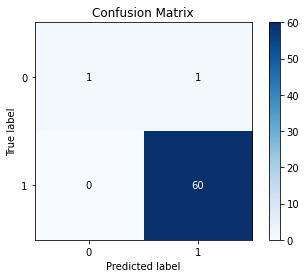

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,  accuracy_score

model2=KNeighborsClassifier(n_neighbors=30,metric='minkowski',p=2)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_pred2, y_test))
print(accuracy_score(y_pred2, y_test))
skplt.metrics.plot_confusion_matrix(y_test, y_pred2, normalize=False)
plt.show()

n= 30 er por r change hoyna

In [ ]:
#roc for kneighbour
from sklearn.datasets import make_classification
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

AUC: 0.9333


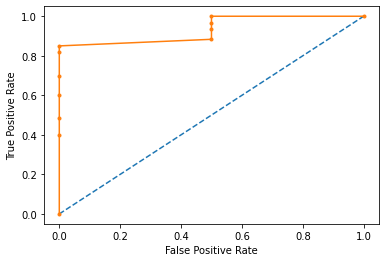

In [ ]:

# generate 2 class dataset
#X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
# split into train/test sets
#trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
#model = KNeighborsClassifier(n_neighbors=3)
#model.fit(trainX, trainy)
# predict probabilities
probs = model2.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
fpr4, tpr4, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr4, tpr4, marker='.')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# show the plot
pyplot.show()

KNN observe

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 1  1]
 [ 9 51]]
              precision    recall  f1-score   support

           0       0.10      0.50      0.17         2
           1       0.98      0.85      0.91        60

    accuracy                           0.84        62
   macro avg       0.54      0.68      0.54        62
weighted avg       0.95      0.84      0.89        62



In [ ]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i, metric='minkowski',p=2)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

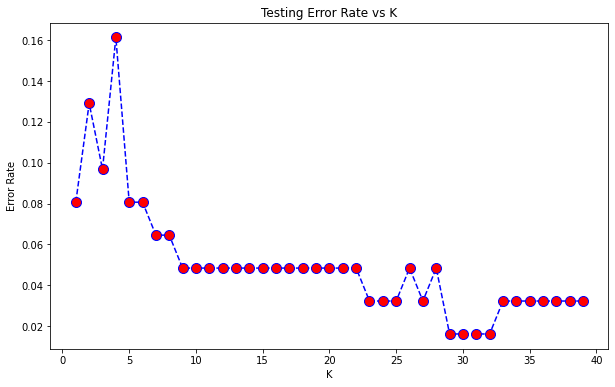

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Testing Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

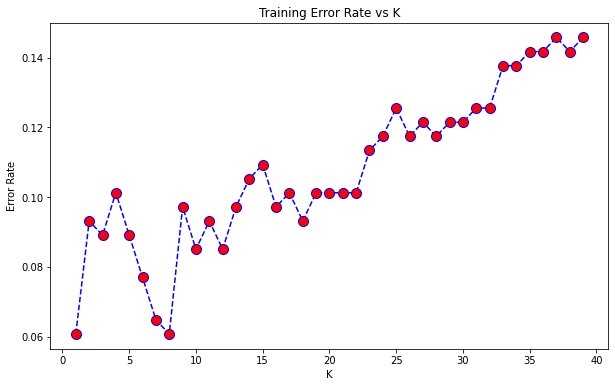

In [ ]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i, metric='minkowski',p=2)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_train)
    error_rate.append(np.mean(pred_i != y_train))

plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Training Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')    

In [ ]:
y_pred1 = model2.predict(X_train)
traing = accuracy_score(y_pred1, y_train)
ein=1-traing    
y_t = model2.predict(X_test)
testing = accuracy_score(y_test, y_t)
eout=1-testing
print(ein)
print(eout)
print("test: ",testing)
print("train: ",traing)

0.12145748987854255
0.016129032258064502
test:  0.9838709677419355
train:  0.8785425101214575


In [ ]:
model2.fit(X_train,y_train)
pred_i = model2.predict(X_train)
e_in=(np.mean(pred_i != y_train))
print(e_in)


pred_i = model2.predict(X_test)
e_out=(np.mean(pred_i != y_test))
print(e_out)

0.1214574898785425
0.016129032258064516


In [ ]:
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

4) AdaBoost

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

0.967741935483871


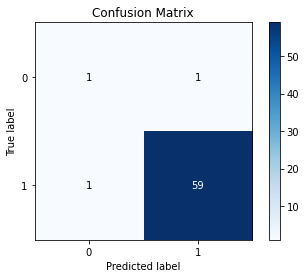

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,  accuracy_score
model3 = AdaBoostClassifier(n_estimators=31, learning_rate=0.5)
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)
print(classification_report(y_pred3, y_test))
print(accuracy_score(y_pred3, y_test))
skplt.metrics.plot_confusion_matrix(y_test, y_pred3, normalize=False)
plt.show()

AUC: 0.9125


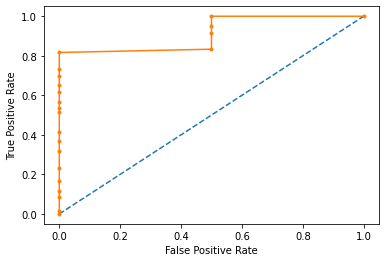

In [ ]:
#roc_for_adabooast
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
probs = model3.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
fpr3, tpr3, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# plot the roc curve for the model
pyplot.plot(fpr3, tpr3, marker='.')
# show the plot
pyplot.show()

In [ ]:
y_pred1 = model3.predict(X_train)
traing = accuracy_score(y_pred1, y_train)
ein=1-traing    
y_t = model3.predict(X_test)
testing = accuracy_score(y_test, y_t)
eout=1-testing
print("Training: ", traing)
print("Testing: ", testing)
print(ein)
print(eout)

Training:  0.9109311740890689
Testing:  0.967741935483871
0.08906882591093113
0.032258064516129004


In [ ]:
model2.fit(X_train,y_train)
pred_i = model3.predict(X_train)
e_in=(np.mean(pred_i != y_train))
print(e_in)


pred_i = model3.predict(X_test)
e_out=(np.mean(pred_i != y_test))
print(e_out)

0.08906882591093117
0.03225806451612903


5) SVM

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.98      0.99        61

    accuracy                           0.98        62
   macro avg       0.75      0.99      0.83        62
weighted avg       0.99      0.98      0.99        62

0.9838709677419355


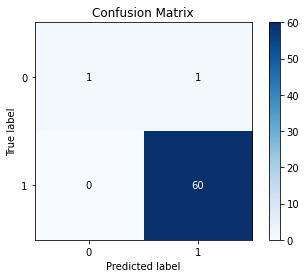

In [ ]:
# SVM

from sklearn.svm import SVC
model6 = SVC(kernel='linear',probability=True)
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
print(classification_report(y_pred6, y_test))
print(accuracy_score(y_pred6, y_test))
skplt.metrics.plot_confusion_matrix(y_test, y_pred6, normalize=False)
plt.show()

In [ ]:
print("Intercept :",model6.intercept_)
print('Slope :',model6.coef_)

Intercept : [2.37679174]
Slope : [[ 0.61885161  0.49815102  0.50045099  0.74962234  0.6815017   0.37483184
   0.24894266  0.37329879  0.73965975 -0.11847673  0.61894509  0.24883414]]


No handles with labels found to put in legend.


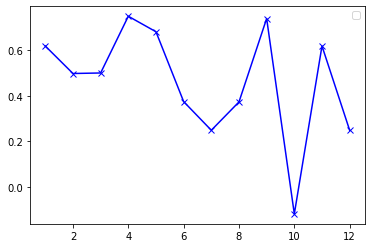

In [ ]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4, 5, 6,7,8,9,10,11,12]
y1 =[ 0.61885161 , 0.49815102 , 0.50045099 , 0.74962234 , 0.6815017  , 0.37483184,
   0.24894266 , 0.37329879 , 0.73965975, -0.11847673,  0.61894509,  0.24883414]
plt.plot(x, y1,color='blue', marker='x', )
plt.legend(loc="best")
plt.show()

AUC: 0.9875


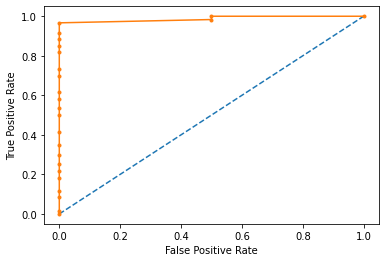

In [ ]:
#roc_for_svm
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
probs = model6.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
fpr6, tpr6, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# plot the roc curve for the model
pyplot.plot(fpr6, tpr6, marker='.')
# show the plot
pyplot.show()

In [ ]:
y_pred1 = model6.predict(X_train)
traing = accuracy_score(y_pred1, y_train)
ein=1-traing    
y_t = model6.predict(X_test)
testing = accuracy_score(y_test, y_t)
eout=1-testing
print("Training: ", traing)
print("Testing: ", testing)
print(ein)
print(eout)

Training:  0.9352226720647774
Testing:  0.9838709677419355
0.06477732793522262
0.016129032258064502


In [ ]:
model6.fit(X_train,y_train)
pred_i = model6.predict(X_train)
e_in=(np.mean(pred_i != y_train))
print(e_in)


pred_i = model6.predict(X_test)
e_out=(np.mean(pred_i != y_test))
print(e_out)

0.06477732793522267
0.016129032258064516


SVM big

In [ ]:
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import math 
import io
import scikitplot as skplt

In [ ]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [ ]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 
# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")
final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test)
#Y_pred_label = list(encoder.inverse_transform(Y_pred))

Best score for training data: 0.9191836734693878 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 



In [ ]:
print("Training set score for SVM: %f" % final_model.score(X_train , y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test  , y_test ))

svm_model.score

Training set score for SVM: 0.935223
Testing  set score for SVM: 0.983871


<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])>

[[ 1  1]
 [ 0 60]]


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.98      1.00      0.99        60

    accuracy                           0.98        62
   macro avg       0.99      0.75      0.83        62
weighted avg       0.98      0.98      0.98        62

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.98      1.00      0.99        60

    accuracy                           0.98        62
   macro avg       0.99      0.75      0.83        62
weighted avg       0.98      0.98      0.98        62



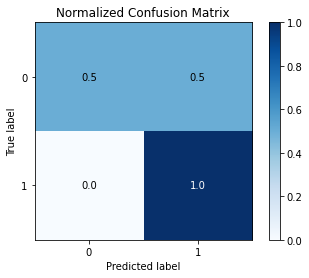

In [ ]:
print(confusion_matrix(y_test,Y_pred))
print("\n")
print(classification_report(y_test,Y_pred))
print(classification_report(y_test, Y_pred))
skplt.metrics.plot_confusion_matrix(y_test, Y_pred, normalize=True)
plt.show()

In [ ]:
model10= svm_model.fit(X_train, y_train)
y_pred1 = model10.predict(X_train)
traing = accuracy_score(y_pred1, y_train)
ein=1-traing    
y_t = model10.predict(X_test)
testing = accuracy_score(y_test, y_t)
eout=1-testing
print("Training: ", traing)
print("Testing: ", testing)
print(ein)
print(eout)

Training:  0.9352226720647774
Testing:  0.9838709677419355
0.06477732793522262
0.016129032258064502


In [ ]:
model10.fit(X_train,y_train)
pred_i = model10.predict(X_train)
e_in=(np.mean(pred_i != y_train))
print(e_in)


pred_i = model10.predict(X_test)
e_out=(np.mean(pred_i != y_test))
print(e_out)

0.06477732793522267
0.016129032258064516


7) Decision Tree

              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.93      0.98      0.96        57

    accuracy                           0.92        62
   macro avg       0.72      0.59      0.62        62
weighted avg       0.90      0.92      0.90        62

0.9193548387096774


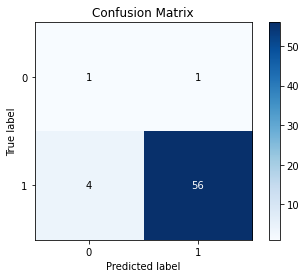

In [ ]:
# decision tree

from sklearn.tree import DecisionTreeClassifier
model7=DecisionTreeClassifier()
model7.fit(X_train, y_train)

y_pred7 = model7.predict(X_test)
print(classification_report(y_pred7, y_test))
print(accuracy_score(y_pred7, y_test))
skplt.metrics.plot_confusion_matrix(y_test, y_pred7, normalize=False)
plt.show()

In [ ]:
y_pred1 = model7.predict(X_train)
traing = accuracy_score(y_pred1, y_train)
ein=1-traing    
y_t = model7.predict(X_test)
testing = accuracy_score(y_test, y_t)
eout=1-testing
print("Training: ", traing)
print("Testing: ", testing)
print(ein)
print(eout)

Training:  0.9554655870445344
Testing:  0.9193548387096774
0.04453441295546556
0.08064516129032262


In [ ]:
model7.fit(X_train,y_train)
pred_i = model7.predict(X_train)
e_in=(np.mean(pred_i != y_train))
print(e_in)


pred_i = model7.predict(X_test)
e_out=(np.mean(pred_i != y_test))
print(e_out)

0.044534412955465584
0.08064516129032258


AUC: 0.7250


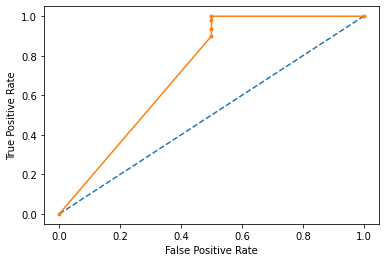

In [ ]:
#roc_curve_for_decisiontree
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
probs = model7.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
fpr7, tpr7, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# plot the roc curve for the model
pyplot.plot(fpr7, tpr7, marker='.')
# show the plot
pyplot.show()

8)XG Boost

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.98      0.99        61

    accuracy                           0.98        62
   macro avg       0.75      0.99      0.83        62
weighted avg       0.99      0.98      0.99        62

0.9838709677419355


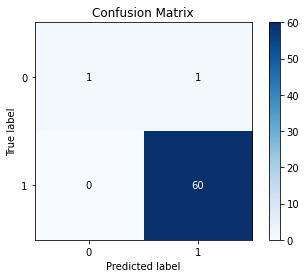

In [ ]:
from sklearn.metrics import classification_report,  accuracy_score
from xgboost import XGBClassifier
model8 = XGBClassifier(learning_rate=0.5, max_depth=9, min_child_weight=3, n_estimators=100, nthread=1, subsample=1.0)
model8.fit(X_train, y_train)
y_pred8 = model8.predict(X_test)
print(classification_report(y_pred8, y_test))
print(accuracy_score(y_pred8, y_test))
skplt.metrics.plot_confusion_matrix(y_test, y_pred8, normalize=False)
plt.show()

In [ ]:
y_pred1 = model8.predict(X_train)
traing = accuracy_score(y_pred1, y_train)
ein=1-traing    
y_t = model8.predict(X_test)
testing = accuracy_score(y_test, y_t)
eout=1-testing
print("Training: ", traing)
print("Testing: ", testing)
print(ein)
print(eout)

Training:  0.9473684210526315
Testing:  0.9838709677419355
0.052631578947368474
0.016129032258064502


In [ ]:
model8.fit(X_train,y_train)
pred_i = model8.predict(X_train)
e_in=(np.mean(pred_i != y_train))
print(e_in)


pred_i = model8.predict(X_test)
e_out=(np.mean(pred_i != y_test))
print(e_out)

0.05263157894736842
0.016129032258064516


AUC: 0.9708


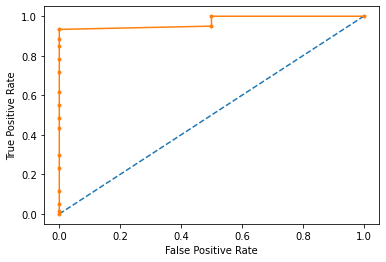

In [ ]:
# RoC for xgboost

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
probs = model8.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.4f' % auc)
# calculate roc curve
fpr8, tpr8, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# plot the roc curve for the model
pyplot.plot(fpr8, tpr8, marker='.')
# show the plot
pyplot.show()

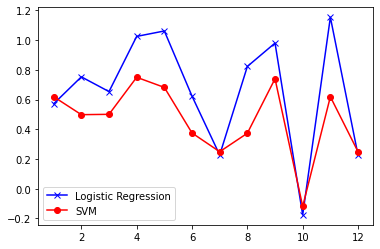

In [ ]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4, 5, 6,7,8,9,10,11,12]
y1 =[ 0.57136098 , 0.75248022 , 0.65340252 , 1.02462063 , 1.06112085 , 0.62288361,
   0.22707185 , 0.82249583 , 0.9797522 , -0.17618264 , 1.15345832 , 0.22617551]
y2 =[ 0.61885161 , 0.49815102 , 0.50045099 , 0.74962234 , 0.6815017  , 0.37483184,
   0.24894266 , 0.37329879 , 0.73965975, -0.11847673,  0.61894509,  0.24883414]
plt.plot(x, y1,color='blue', marker='x', label="Logistic Regression" )
plt.plot(x, y2,color='red', marker='o', label="SVM" )
plt.legend(loc="best")
plt.show()

No handles with labels found to put in legend.


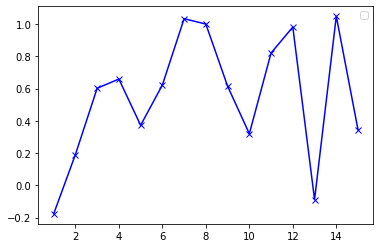

In [ ]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]
y1 = [-0.17702881,  0.19137928,  0.60260333,  0.65951091,  0.37264298,  0.62255893,
   1.03391803,  1.00056221,  0.61545942,  0.32029232,  0.8212902,   0.98206895,
  -0.08805517,  1.04916674,  0.34408843]
plt.plot(x, y1,color='blue', marker='x', )
plt.legend(loc="best")
plt.show()